In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
data = pd.read_csv('/kaggle/input/iris/Iris.csv',index_col="Id")
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [216]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("Species",axis=1).values,data["Species"].values,test_size=.2,random_state=54)

In [217]:
def categori_to_arr(y):
    category_dict = {'Iris-setosa': [1,0,0], 'Iris-versicolor': [0,1,0], 'Iris-virginica': [0,0,1]}        
    return np.array([category_dict[i] for i in y])
y_train = categori_to_arr(y_train)

In [218]:
def rev_categori(y_in):
    """
    category_dict = {tuple([1,0,0]) : 'Iris-setosa',tuple([0,1,0]):'Iris-versicolor',tuple([0,0,1]):'Iris-virginica'}
    y_out = np.array([category_dict[y] for y in tuple(y_in)])
    """
    """
    y_out = []
    for y in y_in:
        if(y == [0,0,1]).all():
            y = 'Iris-virginica'
        elif(y == [0,1,0]).all():
            y = 'Iris-versicolor'
        elif(y == [1,0,0]).all():
            y = 'Iris-setosa'
        y_out.append(y)
    return y_out
    """
    """
    [0.2,0.1,0.6],[0.2,0.1,0.7] -> Irıs ... 
    """
    
    a2_max = np.argmax(y_in, axis=1)
    
    y_pred = []
    for i in a2_max:
        if i == 0:
            y_pred.append('Iris-setosa')
        elif i == 1:
            y_pred.append('Iris-versicolor')
        else:
            y_pred.append('Iris-virginica')
    
    return y_pred

In [219]:
def init_params():
    num_features = 4
    num_hidden_units = 12
    num_output_units = 3

    # rastgele değerlerle başlangıçta ağırlıkların ve biasların tanımlanması
    W1 = np.random.randn(num_features, num_hidden_units)
    b1 = np.zeros(num_hidden_units)
    W2 = np.random.randn(num_hidden_units, num_output_units)
    b2 = np.zeros(num_output_units)

    return W1, b1, W2, b2

In [220]:
W1, b1, W2, b2 = init_params()

In [221]:
def sigmoid(z):
    ret = 1 / (1 + np.exp(-z))
    return ret

In [222]:
def softmax(z):
    ret = np.exp(z) / np.sum(np.exp(z))
    return ret

In [223]:
def ReLU(z):
    return np.maximum(0,z)

In [224]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [225]:
def predict(X, W1, b1, W2, b2):
    """
    Verilen özelliklerin tahmini sınıf etiketlerini döndürür.
    """
    a2, _, _, _ = forward_prop(X, W1, b1, W2, b2)
    y_pred = np.zeros_like(a2)
    y_pred[np.arange(len(a2)), a2.argmax(1)] = 1
    return a2

In [226]:
def calculate_cost(y, a2):
    m = y.shape[0]
    loss = np.multiply(y, np.log(a2)) + np.multiply(1 - y, np.log(1 - a2))
    cost = -1/m * np.sum(loss)
    return cost

In [227]:
def forward_prop(X,W1,b1,W2,b2):
    """
    İnput  -> 4  neuron
    Hidden -> 12 neuron
    Output -> 3  neuron
    """
    # Input Layer
    m,n = X.shape # m -> örnek sayısı, n -> özellik sayısı

    z1 = np.zeros((m,W1.shape[1])) # W1.shape[1] = 12 -> hidden layer boyutu
    for i in range(m):
        for j in range(n):
            z1[i] = np.dot(X[i][j],W1[j]) + b1
    a1 = ReLU(z1)

    #Hidden Layer
    m,n = a1.shape

    z2 = np.zeros((m,W2.shape[1])) # W2.shape[1] = 3 -> Output layer boyutu
    for i in range(m):
        for j in range(n):
            z2[i] = np.dot(z1[i][j],W2[j]) + b2
    a2 = sigmoid(z2)
    #a2 = softmax(z2)
    
    return a2,z2,a1,z1

In [228]:
def backward_prop(X, y, a2, z2, a1, z1, W1, W2):
    # X: input data of shape (num_samples, num_features)
    # y: true labels of shape (num_samples, num_output_units)
    # y_hat: predicted output of shape (num_samples, num_output_units)
    # z2: output of the second layer before activation of shape (num_samples, num_output_units)
    # a1: output of the first layer after activation of shape (num_samples, num_hidden_units)
    # z1: output of the first layer before activation of shape (num_samples, num_hidden_units)
    # W2: weight matrix of shape (num_hidden_units, num_output_units)
    
    m = len(X)
        
    dZ2 = a2 - y
    #dW2 = np.zeros_like(W2)
    #db2 = np.zeros((1, W2.shape[1]))
    dW2 = np.dot(a1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m

    """
    m, n = a1.shape
    for i in range(m):
        for j in range(W2.shape[1]):
            dW2[:,j] += a1[i,:] * dZ2[i,j]
            db2[:,j] += dZ2[i,j]
    """

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (z1 > 0)
    #dW1 = np.zeros_like(W1)
    dW1 = np.dot(X.T, dZ1) / m
    #db1 = np.zeros((1, W1.shape[1]))
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    """
    m, n = X.shape
    for i in range(m):
        for j in range(W1.shape[1]):
            dW1[:,j] += X[i,:] * dZ1[i,j]
            db1[:,j] += dZ1[i,j]
    """

    return dW1, db1, dW2, db2

In [229]:
def gradient_descent(X, y, W1, b1, W2, b2, num_iterations=1000, learning_rate=.001,beta=0.9):
    costs = []
    for i in range(num_iterations):
        # Forward Propagation
        a2, z2, a1, z1 = forward_prop(X, W1, b1, W2, b2)

        # Backward Propagation
        dW1, db1, dW2, db2 = backward_prop(X, y, a2, z2, a1, z1, W1, W2)

        # Parameter Updates
        #W1 = W1 - learning_rate * dW1
        W1 -= learning_rate * (dW1 + beta * W1)
        b1 = b1 - learning_rate * db1
        #W2 = W2 - learning_rate * dW2
        W2 -= learning_rate * (dW2 + beta * W2)
        b2 = b2 - learning_rate * db2

        costs.append(calculate_cost(y, a2))
        
    return W1, b1, W2, b2, costs

In [230]:
W1, b1, W2, b2, costs = gradient_descent(x_train, y_train, W1, b1, W2, b2,200)

In [231]:
preds = predict(x_train, W1, b1, W2, b2)
#label_preds = rev_categori(preds)

Text(0, 0.5, 'Cost')

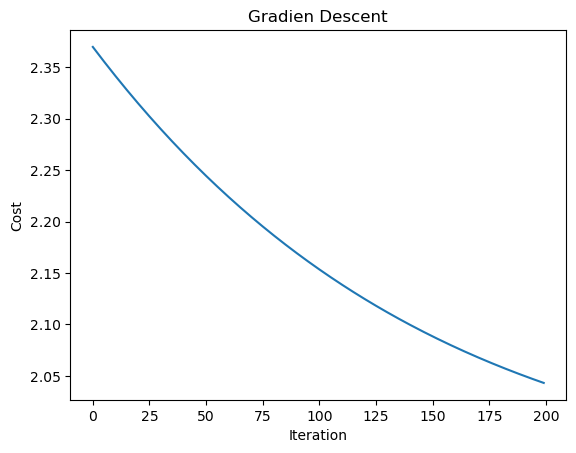

In [232]:
plt.plot(costs)
plt.title("Gradien Descent")
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [233]:
test1, test2 = rev_categori(preds),rev_categori(y_train)

d=0
for i in range(len(test2)):
    if(test1[i] == test2[i]):
        d += 1
        
print(f"{d}/{len(test2)}")

44/120
